In [7]:
import quandl
import tensorflow as tf
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
rng=np.random

df=quandl.get("FMAC/HPI_KOKIN")
df = df.reset_index()
df['Date'] = (df['Date'] - df['Date'].min()) / np.timedelta64(1,'M')
train_X = np.asarray(df['Date'])
train_X=preprocessing.scale(train_X)
train_Y = np.asarray(df['Value'])





In [8]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50
n_samples = train_X.shape[0]

In [9]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [10]:
pred = tf.add(tf.multiply(X, W), b)

In [11]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [12]:
init = tf.global_variables_initializer()


Epoch: 0050 cost= 1167.546630859 W= 7.24148 b= 29.1764
Epoch: 0100 cost= 464.472473145 W= 11.9127 b= 47.1345
Epoch: 0150 cost= 205.793807983 W= 14.7522 b= 58.0246
Epoch: 0200 cost= 110.607780457 W= 16.4783 b= 64.6286
Epoch: 0250 cost= 75.574615479 W= 17.5275 b= 68.6334
Epoch: 0300 cost= 62.675216675 W= 18.1653 b= 71.0625
Epoch: 0350 cost= 57.924694061 W= 18.5529 b= 72.5353
Epoch: 0400 cost= 56.173332214 W= 18.7886 b= 73.4284
Epoch: 0450 cost= 55.526714325 W= 18.9316 b= 73.9702
Epoch: 0500 cost= 55.287799835 W= 19.0187 b= 74.2981
Epoch: 0550 cost= 55.198165894 W= 19.072 b= 74.4995
Epoch: 0600 cost= 55.166160583 W= 19.104 b= 74.6153
Epoch: 0650 cost= 55.153430939 W= 19.1238 b= 74.6883
Epoch: 0700 cost= 55.148342133 W= 19.1355 b= 74.7348
Epoch: 0750 cost= 55.146396637 W= 19.1427 b= 74.7623
Epoch: 0800 cost= 55.145565033 W= 19.1473 b= 74.7806
Epoch: 0850 cost= 55.145221710 W= 19.1499 b= 74.7924
Epoch: 0900 cost= 55.145076752 W= 19.1518 b= 74.7997
Epoch: 0950 cost= 55.145034790 W= 19.1523 b

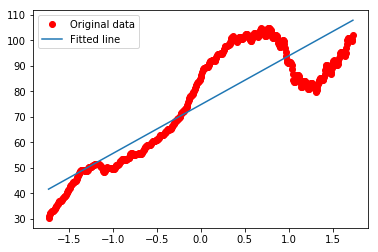

In [13]:
with tf.device('/gpu:0'):
    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        for epoch in range(training_epochs):
            for (x, y) in zip(train_X, train_Y):
                sess.run(optimizer, feed_dict={X: x, Y: y})

                #Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                    "W=", sess.run(W), "b=", sess.run(b))

        print("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
        print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

        #Graphic display
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()
    
